In [1]:
import tensorflow as tf

tf.__version__

ImportError: Traceback (most recent call last):
  File "c:\users\lg\anaconda3\envs\dss15\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
import pandas as pd

pd.concat([pd.DataFrame(iris.data, columns=['m','e','o','w']),pd.DataFrame(iris.target, columns=['w_1'])], axis=1, )

,m,e,o,w,w_1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X = iris.data
y = iris.target

In [6]:
y.shape

(150,)

In [7]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [8]:
enc.categories_

[array([0, 1, 2])]

In [9]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

In [11]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.2445 - accuracy: 0.3973
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0981 - accuracy: 0.6527
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9707 - accuracy: 0.6663
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9114 - accuracy: 0.7394
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8885 - accuracy: 0.6371
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8586 - accuracy: 0.6537
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8214 - accuracy: 0.6787
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.6121
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7531 - accuracy: 0.6996
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7060 - accuracy: 0.6973
Epoch 11/100
4/4 [===========

In [16]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0993 - accuracy: 0.9667


[0.09928162395954132, 0.9666666388511658]

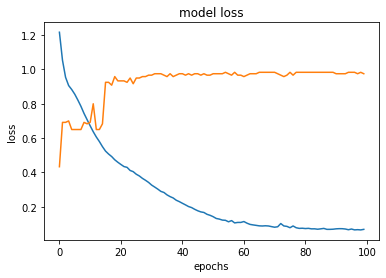

In [23]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()